# Use torch.distributions in all the below questions

## Imports

In [2]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from collections import Counter
import ipywidgets as widgets
from ipywidgets import interact
from collections import Counter

# 1. **Random Variables**

#### Q1. (**Mandatory**)
Write a Python function that simulates rolling two six-sided dice and returns their sum. Use this function to perform 10,000 simulations. Calculate and print:

a) The experimental probability of rolling a sum of 7 <br/>
b) The experimental probability of rolling a sum of 2 or 12<br/>

Compare these experimental probabilities with the theoretical probabilities. What conclusions can you draw about the accuracy of the simulation?

In [3]:
def two_die():
    return np.random.randint(1,6) + np.random.randint(1,6)
samples = []
sample_size = 10000
for i in range(sample_size):
    samples.append(two_die())

In [4]:
cnt_7 = 0
cnt_2_12 = 0
for i in samples:
    if i == 7:
        cnt_7+=1
    elif (i == 2) or (i==12):
        cnt_2_12+=1
eprob_7 = cnt_7/sample_size
tprob_7 = 1/6
eprob_2_12 = cnt_2_12/sample_size
tprob_2_12 = 1/18

In [5]:
print(f"The experimental probability of getting sum 7 is {eprob_7:.4f}")
print(f"The theoretical probability of getting sum 7 is {tprob_7:.4f}")
print()
print(f"The experimental probability of getting sum 2 or 12 is {eprob_2_12:.4f}")
print(f"The theoretical probability of getting sum 2 or 12 is {tprob_2_12:.4f}")


The experimental probability of getting sum 7 is 0.1583
The theoretical probability of getting sum 7 is 0.1667

The experimental probability of getting sum 2 or 12 is 0.0349
The theoretical probability of getting sum 2 or 12 is 0.0556


- The simulation results are close enough for experiment (a) and not that far behind for experiment (b).
- Hence we can conclude that the simulation is somewhat accurate representation of the experiment

#### Q2. (Optional)
Write a function coin_toss(n) that simulates flipping a coin n times, returning a list of 'H' (Heads) and 'T' (Tails). Then, write a function count_heads(flips) that takes the list of flips and returns the number of heads (this is your random variable, X). Finally, simulate 10 coin tosses and print the outcome of the coin tosses and the number of heads.


In [6]:
def coin_toss(n):
    flips = [np.random.choice(['H','T']) for i in range(n)]
    return flips

def count_head(flips):
    return flips.count('H')

In [7]:
n = 10
flips = coin_toss(n)
print(f"The outcome of {n} coin tosses is\n{flips}")
print(f"The number of heads in this experiment are {count_head(flips)}")

The outcome of 10 coin tosses is
['T', 'T', 'H', 'H', 'H', 'T', 'H', 'T', 'T', 'T']
The number of heads in this experiment are 4


#### Q3. (Optional)
#### Coin Flip Simulation and Inverse Mapping Check

Using the `coin_toss(n)` and `count_heads(flips)` functions from Question 1, simulate **n = 4** coin flips.  

Then, given a value **a**, write a function `check_inverse_mapping(flips, a)` that checks whether the number of heads in the simulated coin flips equals **a**. In other words, verify if:  

$$
X(\xi) = a
$$

where:  
- **$X$** represents the function that counts the number of heads in the sequence.  
- **$\xi$** is the outcome of the 4 coin flips.  

The function should print whether **$X(\xi) = a$** is **True or False**.  
Finally, test the function with **a = 2**.  


In [8]:
n = 4
flips = coin_toss(n)
print(f"The outcome of this event is\n{flips}")

The outcome of this event is
['T', 'T', 'T', 'H']


In [9]:
def check_inverse_mapping(flips,a):
    if count_head(flips) == a:
        return True
    return False

In [10]:
a = 2
check_inverse_mapping(flips,a)

False

# 2. **Probalility Mass function**

#### Q1. (**Mandatory**)
Consider a discrete random variable X with possible values {1, 2, 3, 4, 5}. You are given a function f(x) defined as:

$f(x) = c  (x^2 - 6x + 10)$ for x in {1, 2, 3, 4, 5}

where c is a constant.

Write a Python function is_valid_pmf(f) that:

* Determines if f(x) can be a valid PMF for some value of c.

* If valid, calculates and returns the value of c that makes f(x) a legitimate PMF.If not valid, returns None and prints why it's not valid.

Your function should check both properties of a valid PMF:

* Non-negativity for all x

* Sum of probabilities equals 1

Test your function with the given f(x) and explain your results.

In [11]:
def is_valid_pmf(f):
    x_values = np.array([1, 2, 3, 4, 5])
    
    f_X = f(x_values)
    
    # Check if the sum of f(x) is not 0
    total = sum(f_X)
    if total == 0:
        print(f"Invalid PMF: Sum of f(x) is {total} (must not be zero).")
        return None
    
    
    c = 1.0 / total

    f_X = c*f_X
    #Checking if any f(x) is -ve
    for i,j in enumerate(f_X):
        if j<0:
            print(f"Invalid PMF as f({i+1}) gives negative value")
            return None
    return c

def f(x):
    return x**2 - 6*x + 10

result = is_valid_pmf(f)
print(f"Valid PMF constant c: {result}" if result is not None else "No valid c exists.")

Valid PMF constant c: 0.06666666666666667


- The PMF 
$f(x) = c  (x^2 - 6x + 10)$ for x in {1, 2, 3, 4, 5}
    
    is valid only if $c = \frac{1}{15}$
    
    As f(x) should be 1 to be a valid PMF and

    all the f(x)'s should be +ve

#### Q2. (Optional)
Simulate flipping a coin 100 times and calculate the empirical PMF for the number of heads (0 to 100).

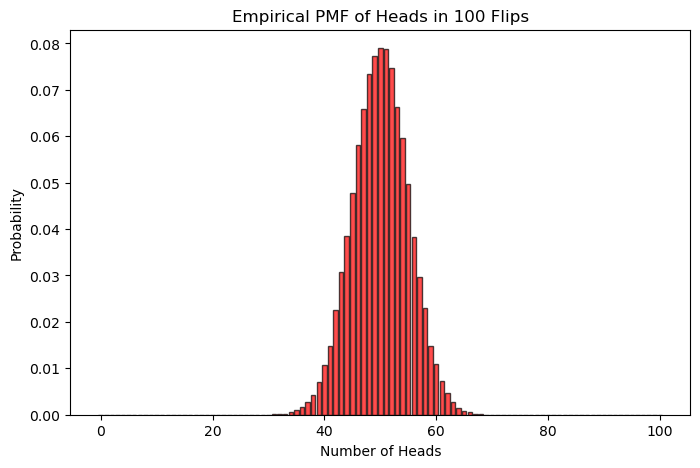

In [12]:
num_trials = 100000
coin_dist = torch.distributions.Binomial(total_count=100, probs=0.5)
samples = coin_dist.sample((num_trials,)).long()
counts = torch.bincount(samples,minlength=101)
pmf = counts/num_trials


plt.figure(figsize=(8,5))
plt.bar(range(101), pmf, alpha=0.7,edgecolor = 'black',color='red')
plt.title("Empirical PMF of Heads in 100 Flips")
plt.xlabel("Number of Heads")
plt.ylabel("Probability")
plt.show()

#### Q3. (Optional)

A small café records the number of customers visiting per day for a month (30 days). The recorded data is as follows:

    customer_counts = [12, 15, 14, 10, 18, 16, 14, 12, 15, 11, 17, 14, 13, 19, 12, 18, 14, 10, 16, 15, 14, 13, 17, 12, 18, 16, 14, 11, 19, 13]
Compute the PMF for the given data and plot it using Matplotlib. Identify the most common number of daily customers and compare the distribution.

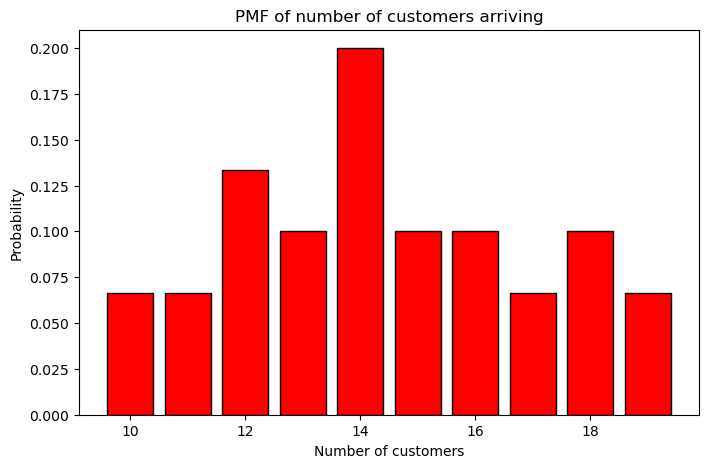

In [13]:
customer_counts = [12, 15, 14, 10, 18, 16, 14, 12, 15, 11, 17, 14, 13, 19, 12, 18, 14, 10, 16, 15, 14, 13, 17, 12, 18, 16, 14, 11, 19, 13]
pmf_customer = Counter(customer_counts)
for i in pmf_customer.keys():
    pmf_customer[i]/=30

plt.figure(figsize=(8,5))
plt.bar(pmf_customer.keys(),pmf_customer.values(),edgecolor='black',color='red')
plt.xlabel("Number of customers")
plt.ylabel("Probability")
plt.title("PMF of number of customers arriving")
plt.show()

# 3. **Cumulative Distribution Function**

#### Q1. (**Mandatory**)

Consider a discrete random variable 𝑋 with possible values 𝑥={1,2,3,4,5} and corresponding probability mass function (PMF):
$$ P(X=x)= \frac{x}{15} ,x∈{1,2,3,4,5}$$

where
𝑃(𝑋=𝑥) represents the PMF of 𝑋.

The Cumulative Distribution Function (CDF) is defined as:
 $$F_X(x) = P(X≤x)=\sum_{k≤x}
 P(X=k)$$


Your Task:
1. Compute the PMF values for each 𝑥∈{1,2,3,4,5}.
2. Compute the CDF $𝐹_X(𝑥)$ for each 𝑥.
3. Verify the relationship between PMF and CDF:
- $ P(X=x)=F_X(x)−F_X(x−1) $ for all 𝑥≥2.
- For 𝑥=1, $𝑃(𝑋=1)=𝐹_𝑋(1)$.
4. Print and compare the computed PMF values with the differences in CDF values to confirm the relationship.

In [14]:
X = np.array([1,2,3,4,5])
pmf_X = X/15
print("The PMF is:")
for i in range(5):
    print(f"P(X={i+1}) = {pmf_X[i]:.3f}")

The PMF is:
P(X=1) = 0.067
P(X=2) = 0.133
P(X=3) = 0.200
P(X=4) = 0.267
P(X=5) = 0.333


In [15]:
F_X = np.array([sum(pmf_X[:i+1]) for i in range(5)])
print("The CDF is:")
for i in range(5):
    print(f"F({i+1}) = {F_X[i]:.3f}")

The CDF is:
F(1) = 0.067
F(2) = 0.200
F(3) = 0.400
F(4) = 0.667
F(5) = 1.000


In [16]:
print('-'*8)
for i in range(1,5):
    # Rounded to avoid floating point error
    a = round(pmf_X[i],3) 
    b = round(F_X[i]-F_X[i-1],3)
    print(f"P(X={i+1}) = {a}")
    print(f"F({i+1}) - F({i}) = {b}")
    print('-'*8)
    if  a!=b :
        print(f"The relation P(X=x) = F(x) - F(x-1) is invalid for x = {i+1}")
        break
else:
    print(f"The relation P(X=x) = F(x) - F(x-1) is valid for all x >= 2")

if pmf_X[0] == F_X[0]:
    print("The relation P(X=1) = F(1) is valid")
else:
    print("The relation P(X=1) = F(1) is invalid")

--------
P(X=2) = 0.133
F(2) - F(1) = 0.133
--------
P(X=3) = 0.2
F(3) - F(2) = 0.2
--------
P(X=4) = 0.267
F(4) - F(3) = 0.267
--------
P(X=5) = 0.333
F(5) - F(4) = 0.333
--------
The relation P(X=x) = F(x) - F(x-1) is valid for all x >= 2
The relation P(X=1) = F(1) is valid


#### Q2. (Optional)

  Write a Python function to compute the **CDF** for a given **discrete probability distribution**. Your function should:  

1. Take as input:  
   - A **list or NumPy array** of possible values of a discrete random variable.  
   - A corresponding **list or NumPy array** of probability mass function (PMF) values.  

2. Return:  
   - A list of CDF values corresponding to the input values.  

Additionally, perform the following:  

- Compute and plot the **CDF** for a **biased 6-sided die**, where the probability distribution is:  

| X   | 3   | 1   | 6   | 2   | 5   | 4   |
|-----|-----|-----|-----|-----|-----|-----|
| P(X)| 0.15| 0.05| 0.25| 0.10| 0.25| 0.20|


- Plot the **CDF as a step function** using **Matplotlib**.  

In [17]:
def cdf_x(X,pmf_X):
    pmf_X = np.array(pmf_X)
    X = np.array(X)
    idx = np.argsort(X)
    X = X[idx]
    pmf_X = pmf_X[idx]
    
    F_X = [pmf_X[0]]
    for i in range(1,len(X)):
        F_X.append(F_X[-1]+pmf_X[i])
    
    return F_X

In [18]:
X = [3,1,6,2,5,4]
pmf_X = [0.15,0.05,0.25,0.10,0.25,0.20]
F_X = cdf_x(X,pmf_X)

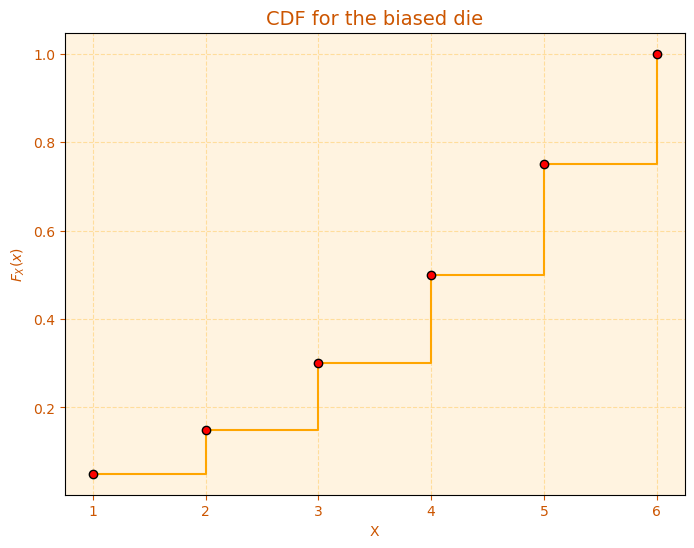

In [19]:
fig,ax = plt.subplots(figsize=(8,6))
ax.step([i for i in range(1,7)], F_X, marker='o', color='orange', where='post', markerfacecolor='red',markeredgecolor='black')
ax.set_facecolor("#FFF3E0")
ax.grid(True, 
        color='#FFD580',
        linestyle='--', 
        alpha=0.7)
ax.set_title("CDF for the biased die",color='#CC5500',fontsize=14)
ax.set_xlabel("X",color='#CC5500')
ax.set_ylabel(r"$F_{X}(x)$",color='#CC5500')
ax.tick_params(colors='#CC5500', labelsize=10)
plt.show()

#### Q3. (Optional)

Define a function pdf(x) representing a normal distribution.

$$
f(x) = \frac{1}{2\pi\sigma^2} e^{-\frac{(x-\mu)^2}{2\sigma ^2}}
$$

Now calcluate the CDF of this function and plot it along with the curve for the above normal distribution.

In [20]:
mean = 0
std = 1
norm_dist = torch.distributions.Normal(mean,std)
X = torch.linspace(mean-3*std,mean+3*std,100)
cdf_X = norm_dist.cdf(X)
pdf_X = norm_dist.log_prob(X).exp()

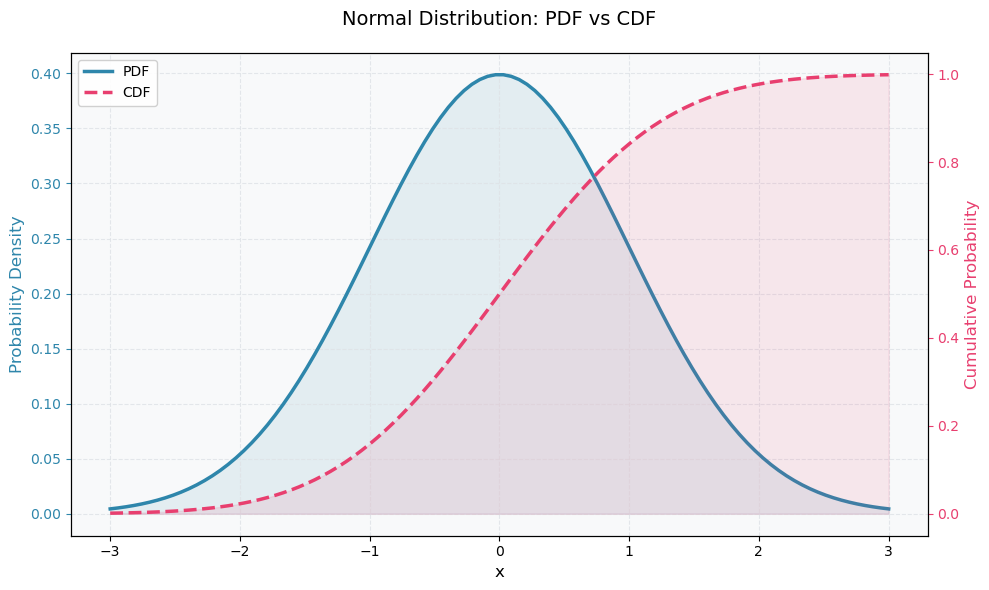

In [21]:
colors = {
    'pdf': '#2E86AB',    # Sophisticated blue
    'cdf': '#E83F6F',    # Vibrant pink-red
    'background': '#F8F9FA'  # Off-white background
}

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(X, pdf_X, 
        color=colors['pdf'], 
        linewidth=2.5,
        label='PDF')
ax1.fill_between(X, pdf_X, 
                color=colors['pdf'], 
                alpha=0.1)


ax2 = ax1.twinx()
ax2.plot(X, cdf_X, 
        color=colors['cdf'], 
        linewidth=2.5,
        label='CDF',
        linestyle='--')
ax2.fill_between(X, cdf_X, 
                color=colors['cdf'], 
                alpha=0.1)


ax1.set_facecolor(colors['background'])
ax1.grid(color='#DEE2E6', linestyle='--', alpha=0.8)
ax1.set_ylabel("Probability Density", color=colors['pdf'], fontsize=12)
ax2.set_ylabel("Cumulative Probability", color=colors['cdf'], fontsize=12)
ax1.set_xlabel("x", fontsize=12)


plt.title("Normal Distribution: PDF vs CDF", fontsize=14, pad=20)
lines = ax1.get_lines() + ax2.get_lines()
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc='upper left', framealpha=0.9)


ax1.tick_params(axis='y', colors=colors['pdf'])
ax2.tick_params(axis='y', colors=colors['cdf'])

plt.tight_layout()
plt.show()

# 4. **Expectation**

#### Q1. (**Mandatory**)
Simulate a game where you flip a coin three times. The reward system is as follows:


*   $8 for exactly 3 heads

*   $1 for exactly 2 heads,

*   $0 otherwise.

The cost to play the game is $1.5. Run the simulation for 10,000 trials and compute the average net gain, compare with theoretical expected net gain?


##### Answer:
The net gain would be
* $6.5 for exactly 3 heads
* -$0.5 for exactly 2 heads
* -$1.5 otherwise.

Hence the theoretical gain would be

$$Gain\ =\$\left(\ 6.5\times\frac{1}{8}\ -0.5\times\frac{3}{8}\ -\ 1.5\times\frac{4}{8}\right)$$
$$\implies\ Gain\ =\ -\$ 0.125$$

In [22]:
number_of_flips = 3
num_trials = 100000
coin_dist = torch.distributions.Binomial(total_count=number_of_flips, probs=0.5)
samples = coin_dist.sample((num_trials,)).long()
counts = torch.bincount(samples,minlength=number_of_flips+1)
pmf = counts/num_trials
gain = torch.tensor([-1.5,-1.5,-0.5,6.5])
pmf_gain = pmf*gain
net_gain = sum(pmf_gain)

print(f"The net gain from the game(simulation) is {net_gain:.3f}")
print(f"The theoretical net gain from the game is {-0.125:.3f}")

The net gain from the game(simulation) is -0.127
The theoretical net gain from the game is -0.125


The theoretical net gain is very close to the net gain from our simulation

#### Q2. (Optional)
Write a Python function that computes the expected value of a discrete random variable given its probability mass function (PMF). The function should take a dictionary where keys represent outcomes and values represent their corresponding probabilities.

Example:
```python
pmf = {1: 0.2, 2: 0.3, 3: 0.5}
expected_value = compute_expected_value(pmf)
print(expected_value)  # Expected Output: 2.3

```




In [23]:
def compute_expected_value(pmf):
    return sum([i*pmf[i] for i in pmf.keys()])

pmf = {1: 0.2, 2: 0.3, 3: 0.5}
expected_value = compute_expected_value(pmf)
print(f"The expected value of the pmf is {expected_value}") 


The expected value of the pmf is 2.3


#### Q3. (Optional)

Given a discrete random variable with its probability mass function (PMF), compute the expected value of a function \(g(x)\). The function \(g(x)\) should be provided as input.

Example:
```python
pmf = {1: 0.2, 2: 0.3, 3: 0.5}
g = lambda x: x**2
expected_value = compute_expected_value_of_function(pmf, g)
print(expected_value)


In [24]:
def compute_expected_value_of_function(pmf,g=lambda x:x):
    return sum([g(i)*pmf[i] for i in pmf.keys()])

pmf = {1: 0.2, 2: 0.3, 3: 0.5}
g = lambda x: x**2
expected_value = compute_expected_value_of_function(pmf, g)
print(f"The expected value of the function g(x) = x^2 is {expected_value}")

The expected value of the function g(x) = x^2 is 5.9


# 5. **Moments and Variance**

#### Q1. (**Mandatory**)
Write a function to compute the variance of a discrete random variable given its probability mass function.

Example:
```python
pmf = {1: 0.2, 2: 0.3, 3: 0.5}
variance = compute_variance(pmf)
print(variance)


In [25]:
def compute_variance(pmf):
    mean = compute_expected_value(pmf)
    return sum([((i-mean)**2)*pmf[i] for i in pmf.keys()])

pmf = {1: 0.2, 2: 0.3, 3: 0.5}
variance = compute_variance(pmf)
print(variance)

0.61


#### Q2. (Optional)
Write a function to compute the k-th moment of a discrete random variable given its probability mass function.

Example:
```python
pmf = {1: 0.2, 2: 0.3, 3: 0.5}
k = 3
moment = compute_moment(pmf, k)
print(moment)


In [26]:
def compute_moment(pmf,k):
    return sum([i**k*pmf[i] for i in pmf.keys()])

pmf = {1: 0.2, 2: 0.3, 3: 0.5}
k = 3
moment = compute_moment(pmf, k)
print(moment)

16.1


#### Q3. (Optional)
Simulate and Estimate the variance of a given function \( f(x) \) when \( X \) is uniformly distributed over [a, b].

Example:
```python
import numpy as np
f = lambda x: x**2
a, b, N = 0, 1, 10000
variance = estimate_variance(f, a, b, N)
print(variance)


In [27]:
def estimate_variance(f,a,b,N):
    X = torch.distributions.uniform.Uniform(a,b)
    samples = X.sample((N,))
    pmf_X = f(samples)
    mean = pmf_X.mean()
    variance = ((pmf_X-mean)**2).mean()
    return variance

import numpy as np
f = lambda x: x**2
a, b, N = 0, 1, 10000
variance = estimate_variance(f, a, b, N)
print(f"The variance is: {variance.item():.6f}")

The variance is: 0.088083


# 6. **Bernoulli Random Variables**

#### Q1. (**Mandatory**)
Write a function that simulates a Bernoulli-distributed random variable with a given probability \( p \).

Example:
```python
p = 0.7
outcome = bernoulli_trial(p)
print(outcome)  # Expected Output: 0 or 1


In [28]:
def bernoulli_trial(p):
    dist = torch.distributions.Bernoulli(p)
    return dist.sample((1,))

p = 0.7
outcome = bernoulli_trial(p)
print(outcome.item())

1.0


#### Q2. (Optional)
Given \( p \), the probability of success in a Bernoulli distribution, compute its expectation and variance.

Example:
```python
p = 0.5
expectation, variance = bernoulli_stats(p)
print(expectation, variance)


In [29]:
def bernoulli_stats(p):
    mean = p
    variance = p*(1-p)
    return mean, variance

p = 0.5
expectation, variance = bernoulli_stats(p)
print(expectation, variance)

0.5 0.25


#### Q3. (Optional)
Write a function that simulates `N` Bernoulli trials and computes the proportion of successes.

Example:
```python
p = 0.3
N = 1000
proportion = simulate_bernoulli(p, N)
print(proportion)


In [30]:
def simulate_bernoulli(p, N):
    dist = torch.distributions.Bernoulli(p)
    samples = dist.sample((N,))
    count = samples.sum()
    prop = count/N
    return prop

p = 0.3
N = 1000
proportion = simulate_bernoulli(p, N)
print(f"{proportion.item():.2f}")

0.30


# 7. **Binomial Distribution**

#### Q1. (**Mandatory**)
Write a Python function that simulates a Binomial random variable. The function should take three inputs:
- `n` (number of trials)
- `p` (probability of success)
- `size` (number of random values to generate)

Plot a histogram of the generated values for `n=10`, `p=0.5`, and `size=1000`.


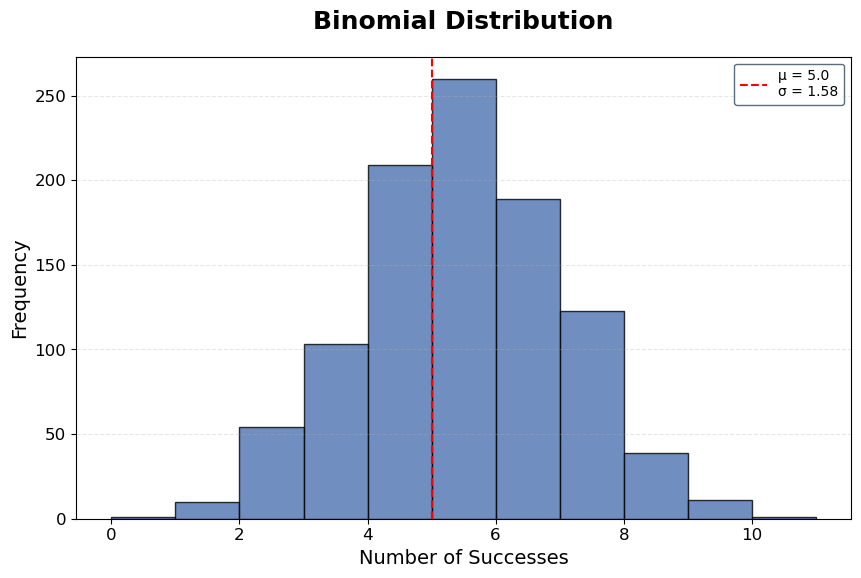

In [31]:
def binomial_trial(n, p, size=10000):
    dist = torch.distributions.Binomial(n, p)
    return dist.sample((size,))


n, p, size = 10, 0.5, 1000
outcomes = binomial_trial(n, p, size)


plt.figure(figsize=(10, 6))

# Plot the histogram of outcomes
counts, bins, patches = plt.hist(
    outcomes, 
    bins=range(12), 
    alpha=0.8, 
    edgecolor='black', 
    color='#4c72b0'
)

plt.title("Binomial Distribution", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Number of Successes", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.3)

# Calculate and annotate the mean value
mean_val = n * p
std_dev = (n * p * (1 - p))**0.5
textstr = f'μ = {mean_val:.1f}\nσ = {std_dev:.2f}'
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5,label = textstr)
leg = plt.legend(frameon=True, facecolor='white', edgecolor='#34495e')
plt.setp(leg.get_texts(), color='black')
plt.show()


In [32]:
for i in plt.style.available:
    print(i)

Solarize_Light2
_classic_test_patch
_mpl-gallery
_mpl-gallery-nogrid
bmh
classic
dark_background
fast
fivethirtyeight
ggplot
grayscale
seaborn-v0_8
seaborn-v0_8-bright
seaborn-v0_8-colorblind
seaborn-v0_8-dark
seaborn-v0_8-dark-palette
seaborn-v0_8-darkgrid
seaborn-v0_8-deep
seaborn-v0_8-muted
seaborn-v0_8-notebook
seaborn-v0_8-paper
seaborn-v0_8-pastel
seaborn-v0_8-poster
seaborn-v0_8-talk
seaborn-v0_8-ticks
seaborn-v0_8-white
seaborn-v0_8-whitegrid
tableau-colorblind10


#### Q2. (Optional)
Write a Python program that:
1. Computes the probability mass function (PMF) of a Binomial distribution.
2. Plots the PMF for `n=20` and `p=0.3`.


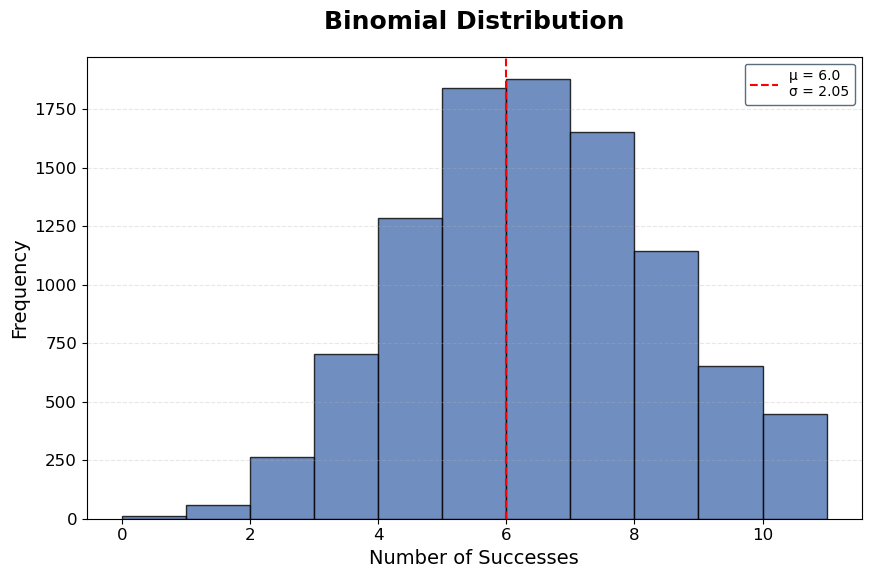

In [33]:
n = 20
p = 0.3
outcome = binomial_trial(n,p)

plt.figure(figsize=(10, 6))

# Plot the histogram of outcomes
counts, bins, patches = plt.hist(
    outcome, 
    bins=range(12), 
    alpha=0.8, 
    edgecolor='black', 
    color='#4c72b0'
)

plt.title("Binomial Distribution", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Number of Successes", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.3)

# Calculate and annotate the mean value
mean_val = n * p
std_dev = (n * p * (1 - p))**0.5
textstr = f'μ = {mean_val:.1f}\nσ = {std_dev:.2f}'
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5,label = textstr)
leg = plt.legend(frameon=True, facecolor='white', edgecolor='#34495e')
plt.setp(leg.get_texts(), color='black')
plt.show()


#### Q3. (Optional)
Simulate a fair coin being flipped 100 times and count the number of heads. Repeat this experiment 1000 times and visualize the distribution using a histogram. Explain how this relates to the Binomial distribution.

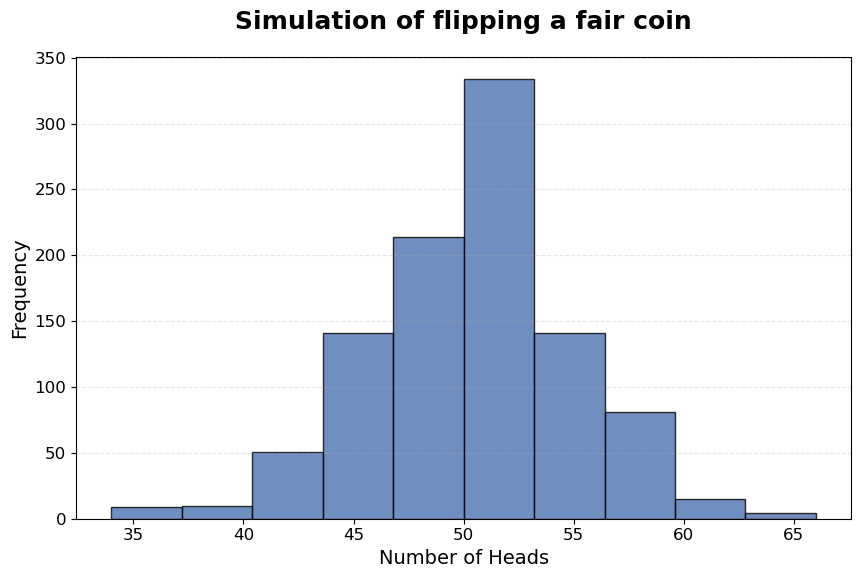

In [34]:
n, p, size = 100, 0.5, 1000
outcomes = binomial_trial(n, p, size)


plt.figure(figsize=(10, 6))

# Plot the histogram of outcomes
counts, bins, patches = plt.hist(
    outcomes, 
    alpha=0.8, 
    edgecolor='black', 
    color='#4c72b0'
)

plt.title("Simulation of flipping a fair coin", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Number of Heads", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


* Each coin toss is independent and has two possible outcomes H or T with probability of success p = 0.5 (say H is success)
* When we perform 100 such tosses, we see that the probability of k-heads is
$$P(X=k) = \binom{100}{k}\ (0.5)^k (0.5)^{n-k}$$
which is quite similar to the binomial distribution $X \sim Binomial(100,0.5)$

# 8. **Geometric Distribution**

#### Q1. (**Mandatory**)
#### Simulating Geometric Distribution
Write a Python function that generates random numbers from a Geometric distribution. The function should take:
- `p` (probability of success)
- `size` (number of values to generate)

Plot a histogram for `p=0.3` and `size=1000`.

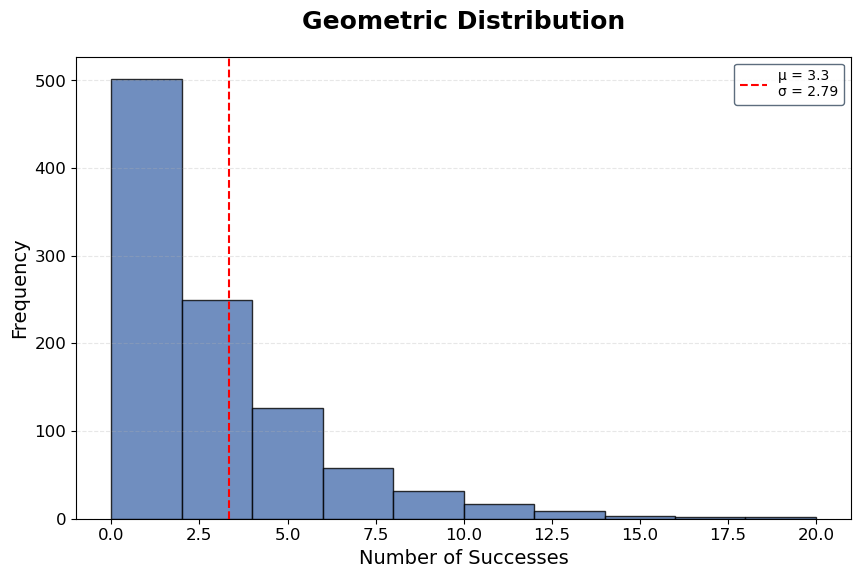

In [35]:
def geometric_trial(p, size=10000):
    dist = torch.distributions.Geometric(p)
    return dist.sample((size,))

p, size = 0.3, 1000
outcomes = geometric_trial(p, size)
plt.figure(figsize=(10, 6))

# Plot the histogram of outcomes
counts, bins, patches = plt.hist(
    outcomes,
    alpha=0.8, 
    edgecolor='black', 
    color='#4c72b0'
)

plt.title("Geometric Distribution", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Number of Successes", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.3)

# Calculate and annotate the mean value
mean_val = 1/p
std_dev = ((1-p)/(p**2))**0.5
textstr = f'μ = {mean_val:.1f}\nσ = {std_dev:.2f}'
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5,label = textstr)
leg = plt.legend(frameon=True, facecolor='white', edgecolor='#34495e')
plt.setp(leg.get_texts(), color='black')
plt.show()


#### Q2. (Optional)
#### Expected Number of Trials
Create an interactive Python program that uses `ipywidgets` and `matplotlib` to visualize the probability mass function (PMF) of the Geometric distribution. Users can adjust the probability of success \( p \) and the maximum number of trials \( k \) to display.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider
import ipywidgets as widgets
from IPython.display import display

def geometric_pmf(k, p):
    return p * (1 - p) ** (k - 1)

def plot_geometric_pmf(p=0.3, max_k=20):
    
    plt.figure(figsize=(10, 6))
    
    k_values = np.arange(1, max_k + 1)
    
    pmf_values = geometric_pmf(k_values, p)
    
    plt.stem(k_values, pmf_values, basefmt='b-', linefmt='b-', markerfmt='bo')
    
    expected_value = 1 / p
    
    plt.axvline(x=expected_value, color='r', linestyle='--', 
                label=f'Expected Value = {expected_value:.2f}')
    
    plt.xlabel('Number of Trials Until First Success (k)')
    plt.ylabel('Probability: P(X = k)')
    plt.title(f'Geometric Distribution PMF with p = {p}')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    

# Create interactive widgets
p_slider = widgets.FloatSlider(
    value=0.3,
    min=0.01,
    max=1.0,
    step=0.01,
    description='p:',
    continuous_update=False
)

max_k_slider = widgets.IntSlider(
    value=20,
    min=5,
    max=50,
    step=1,
    description='Max k:',
    continuous_update=False
)

# Create the interactive plot
interactive_plot = widgets.interact(plot_geometric_pmf, p=p_slider, max_k=max_k_slider)


interactive(children=(FloatSlider(value=0.3, continuous_update=False, description='p:', max=1.0, min=0.01, ste…

#### Q3. (Optional)
#### Estimating `p` from Sample Data
Generate a dataset of 500 Geometric random variables with `p=0.4`. Then, estimate `p` from the data using the formula:

$$\hat{p} = \frac{1}{\text{sample mean}}$$

Compare the estimated value with the true `p=0.4` and compute the percentage error.

In [37]:
def geometric_variable(p,n):
    dist = torch.distributions.Geometric(p)
    # Adding 1 to the samples as the Geometric distribution in PyTorch starts from 0
    samples = dist.sample((n,)) + 1
    return samples 

p,n = 0.4,500
samples = geometric_variable(p,n)
mean = samples.float().mean()
p_est = 1/mean
print(f"The estimated value of p is {p_est:.2f}")
err = abs(p_est-p)*100/p
print(f"The error in estimation is {err:.2f}%")

The estimated value of p is 0.40
The error in estimation is 1.21%


# 9. **Poisson Distribution**

#### Q1. (**Mandatory**)
Write a Python function that generates Poisson random variables. The function should take:
- `λ` (expected number of events per interval)
- `size` (number of values to generate)

Plot a histogram for `λ=5` and `size=1000`.

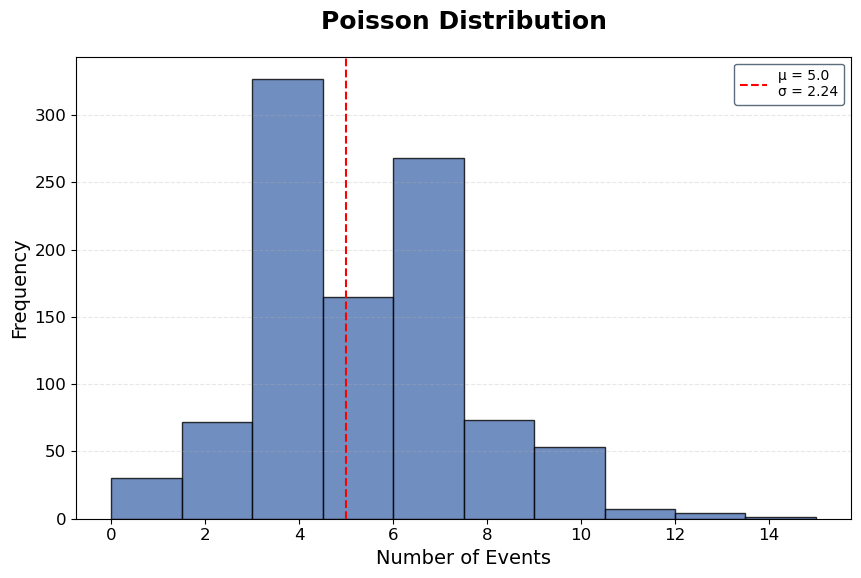

In [38]:
def poisson_variable(lam,n):
    dist = torch.distributions.Poisson(lam)
    samples = dist.sample((n,))
    return samples

lam,n = 5,1000
samples = poisson_variable(lam,n)

plt.figure(figsize=(10, 6))

# Plot the histogram of outcomes
counts, bins, patches = plt.hist(
    samples,
    alpha=0.8, 
    edgecolor='black', 
    color='#4c72b0'
)

plt.title("Poisson Distribution", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Number of Events", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.3)

# Calculate and annotate the mean value
mean_val = lam
std_dev = (lam)**0.5
textstr = f'μ = {mean_val:.1f}\nσ = {std_dev:.2f}'
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5,label = textstr)
leg = plt.legend(frameon=True, facecolor='white', edgecolor='#34495e')
plt.setp(leg.get_texts(), color='black')
plt.show()


#### Q2. (Optional)
Generate 1000 samples from a Binomial distribution with `n=100` and `p=0.05`. Then, generate 1000 samples from a Poisson distribution with `λ=n*p=5`. Compare their histograms and explain why the Poisson distribution approximates the Binomial distribution for large `n` and small `p`.

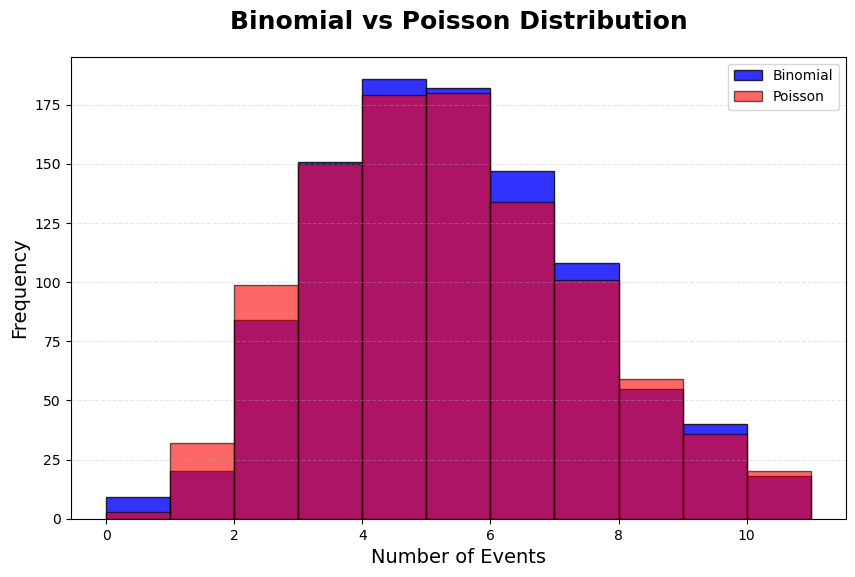

In [39]:
binom_samples = binomial_trial(100,0.05,1000)
poisson_samples = poisson_variable(5,1000)

plt.figure(figsize=(10, 6))
plt.hist(
    binom_samples, 
    bins=range(12), 
    alpha=0.8, 
    edgecolor='black', 
    color='blue',
    label='Binomial'
)

plt.hist(
    poisson_samples, 
    bins=range(12), 
    alpha=0.6, 
    edgecolor='black', 
    color='red',
    label='Poisson'
)

plt.title("Binomial vs Poisson Distribution", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Number of Events", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

* When n is large and p is small $Binomial(n,p)\ \sim\ Poisson(np)$
* This can be confirmed by the histogram comparision when n = 100 and p = 0.05
* The histogram for Poisson and Binomial are almost the same

#### Q3. (Optional)
A call center receives calls at an average rate of 3 calls per minute. Assume the number of calls follows a Poisson distribution.
1. Compute the probability of receiving exactly 5 calls in a minute.
2. Compute the probability of receiving at most 5 calls.

In [40]:
poisson_dist = torch.distributions.Poisson(3)
p1 = poisson_dist.log_prob(torch.tensor(5)).exp()
x = torch.tensor([i for i in range(6)])
p2 = poisson_dist.log_prob(x).exp().sum()
print(f"The probability of getting exactly 5 events is {p1:.4f}")
print(f"The probability of getting at most 5 events is {p2:.4f}")

The probability of getting exactly 5 events is 0.1008
The probability of getting at most 5 events is 0.9161


# 10. **Probability Density function**

#### Q1. (**Mandatory**)
Implement a piecewise PDF defined as:

$$
f(x) =
\begin{cases}
0.5x & \text{if } 0 \leq x \leq 1 \\
2 - x & \text{if } 1 < x \leq 2 \\
0 & \text{otherwise}
\end{cases}
$$

Compute P(0.5≤X≤1.5) analytically and verify using numerical integration.

Plot the PDF and highlight the area under the curve for the computed probability.

In [41]:
def f(x):
    if 0<=x<=1:
        return 0.5*x
    elif 1<x<=2:
        return 2-x
    else:
        return 0

X = torch.linspace(0.5,1.5,100)
P_X = [f(x) for x in X]
Px = sum(P_X)
print(f"P(0.5<=X<=1.5) = {Px/100:.2f}")

P(0.5<=X<=1.5) = 0.56


* Theoretically $P\left(0.5\le X\le1.5\right)\ =\ 0.5625$

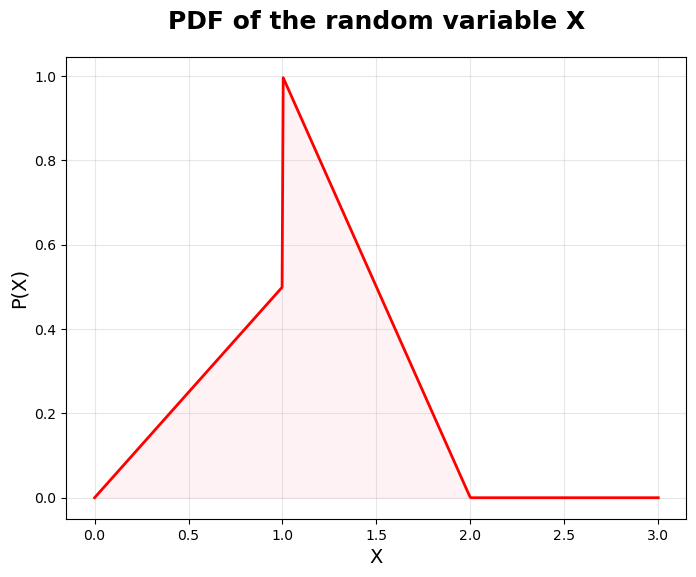

In [42]:
X = torch.linspace(0,3,500)
P_X = [f(x) for x in X]

plt.figure(figsize=(8,6))
plt.plot(X,P_X,color='red',linewidth=2)
plt.fill_between(X,P_X,color='pink',alpha=0.2)
plt.xlabel("X",fontsize=14)
plt.ylabel("P(X)",fontsize=14)
plt.title("PDF of the random variable X",fontsize=18,fontweight='bold',pad=20)
plt.grid(True,alpha=0.3)
plt.show()

#### Q2. (Optional)
Write a Python program to estimate the probability density function of a given dataset using a histogram.

* Generate or load a dataset (e.g., from a normal distribution with mean = 0 and standard deviation = 1, sample size = 1000).
* Compute the histogram with an appropriate number of bins.
* Normalize the histogram so that it represents a probability density function and plot the estimated PDF.

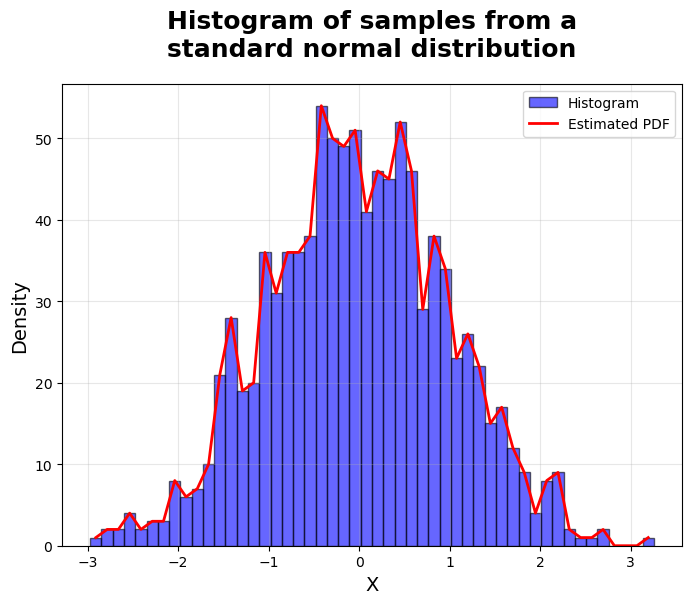

In [43]:
norm_dist = torch.distributions.Normal(0,1)
samples = norm_dist.sample((1000,))
X = torch.linspace(-4,4,400)
pdf = norm_dist.log_prob(X).exp()

plt.figure(figsize=(8,6))
counts,bins,patches = plt.hist(
    samples.numpy(), 
    bins=50,
    alpha=0.6, 
    color='blue', 
    edgecolor='black',
    label="Histogram"
)
bin_centers = 0.5*(bins[1:]+bins[:-1])
plt.plot(bin_centers,counts,color='red',linewidth=2,label="Estimated PDF")
plt.xlabel("X",fontsize=14)
plt.ylabel("Density",fontsize=14)
plt.title("Histogram of samples from a\nstandard normal distribution",fontsize=18,fontweight='bold',pad=20)
plt.grid(True,alpha=0.3)
plt.legend()
plt.show()

#### Q3. (Optional)
Random variable X defined as:

Discrete PMF: P(X=0)=0.2.

Continuous PDF: For 1≤x≤3, f(x)=0.4.

X is undefined outside {0}∪[1,3].

* a) Confirm the total probability is 1.
* b) Compute P(1.5≤X≤2.5).

* Theoretically part (a) is trivial and the total probability is 1
* (b) P(1.5≤X≤2.5) = 0.4

In [44]:
def f(x):
    if x==0:
        return 0.2
    elif 1<=x<=3:
        return 0.4
    return 0

In [45]:
discrete_prob = f(0)
X = torch.linspace(1,3,1000)
continuous_prob = np.trapz([f(x) for x in X],X)
print(f"The discrete probability is {discrete_prob:.2f}")
print(f"The continuous probability is {continuous_prob:.2f}")
print(f"The total probability is {discrete_prob+continuous_prob:.2f}")

The discrete probability is 0.20
The continuous probability is 0.80
The total probability is 1.00


In [46]:
X = torch.linspace(1.5,2.5,400)
P_X = [f(x) for x in X]
Px = sum(P_X)
print(f"P(1.5<=X<=2.5) = {Px/400:.2f}")

P(1.5<=X<=2.5) = 0.40


# 11. **Expectation(continuous)**

#### Q1. (**Mandatory**)
Implement a function to compute E[X] for a continuous random variable with a piecewise probability density function (PDF).

```python
def expectation_piecewise_pdf(intervals: list, funcs: list) -> float:
    """
    Compute E[X] for a piecewise PDF defined over intervals.
    
    Args:
        intervals: List of tuples defining intervals, e.g., [(0, 1), (1, 2)]
        funcs: List of functions corresponding to each interval's PDF
    """
    
    # Example:
    def f1(x): return x   # For 0 <= x <= 1
    def f2(x): return 2 - x  # For 1 < x <= 2
    expectation_piecewise_pdf([(0, 1), (1, 2)], [f1, f2]) ≈ 1.0



In [47]:
def expectation_piecewise_pdf(intervals, funcs):
    expectation = 0
    for i in range(len(intervals)):
        a,b = intervals[i]
        f = funcs[i]
        expectation += np.trapz([f(x) for x in np.linspace(a,b,1000)],[x for x in np.linspace(a,b,1000)])
    return expectation
f1 = lambda x: x
f2 = lambda x: 2-x
expectation_piecewise_pdf([(0, 1), (1, 2)], [f1, f2])

1.0

#### Q2. (Optional)
Compute E[g(X)] for a continuous random variable X with PDF f(x) and transformation g, using numerical integration.
```python
def expectation_transform(g, pdf, lower: float, upper: float) -> float:
    """
    Compute E[g(X)] where X has the given PDF.
    
    Args:
        g: Function to transform X (e.g., lambda x: x**2)
        pdf: Probability density function of X
        lower: Lower bound of X's support
        upper: Upper bound of X's support
    """
    # Example:
    f = lambda x: 2*x  # PDF for X ~ Uniform(0,1) transformed by Y=2X
    expectation_transform(lambda x: x, f, 0, 1) ≈ 2/3
  


In [48]:
def expectation_transform(g, pdf, lower, upper):
    return np.trapz([g(x)*pdf(x) for x in np.linspace(lower,upper,1000)],[x for x in np.linspace(lower,upper,1000)])

# Example:
f = lambda x: 2*x  # PDF for X ~ Uniform(0,1) transformed by Y=2X
expectation_transform(lambda x: x, f, 0, 1) #≈ 2/3

0.666667000667668

# **12. Cumulative distribution function for continuous random variables**

#### Q1. (**Mandatory**)
Write a function to compute and plot the Cumulative Distribution Function (CDF) for a Uniform continuous random variable
𝑋 ∼ 𝑈(𝑎,𝑏) given the probability density function (PDF):


$$ f_X(x)= \begin{cases}
\frac{1}{b−a} & ,\text a≤x≤b \\
0 & ,\text {otherwise}
\end {cases}
$$

Your function should:

1. Take a and b (where 𝑎 < 𝑏) as inputs.
2. Compute the CDF $𝐹_𝑋(𝑥)$
3. Generate an array of 𝑥-values and compute $ 𝐹_𝑋(𝑥) $.
4. Plot the CDF curve using Matplotlib.​















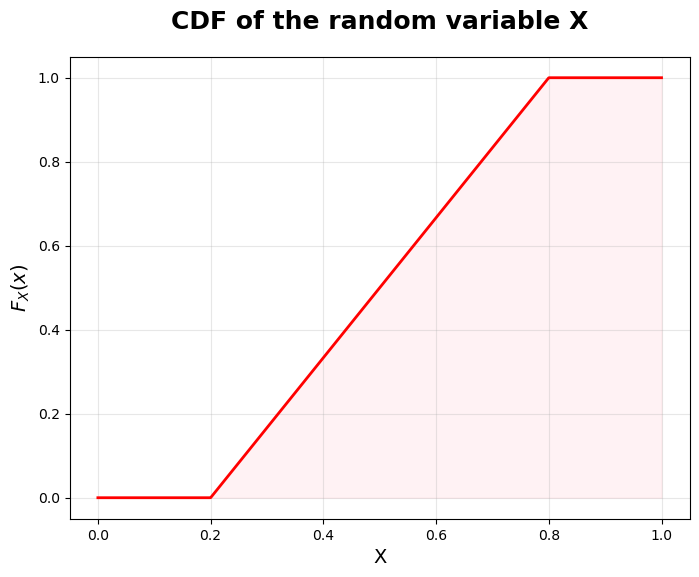

In [49]:
def cdf_uni(a,b,x):
    if x<=a:
        return 0
    elif a<x<=b:
        return (x-a)/(b-a)
    else:
        return 1
    

x = torch.linspace(0,1,1000)
cdf = [cdf_uni(0.2,0.8,i) for i in x]

plt.figure(figsize=(8,6))
plt.plot(x,cdf,color='red',linewidth=2)
plt.fill_between(x,cdf,color='pink',alpha=0.2)
plt.xlabel("X",fontsize=14)
plt.ylabel(r"$F_{X}(x)$",fontsize=14)
plt.title("CDF of the random variable X",fontsize=18,fontweight='bold',pad=20)
plt.grid(True,alpha=0.3)
plt.show()


#### Q2. (Optional)
A continuous random variable 𝑋 follows an Exponential distribution with a given rate parameter 𝜆. The probability density function (PDF) of 𝑋 is:
    $$ f_X(x)=λe^{−λx} ,x≥0 $$

Your task is to derive and compute the CDF $𝐹_𝑋(𝑥)$ of the given exponential distribution for a given 𝜆.

Instructions:
1. Write a function that takes 𝑥 and 𝜆 as input and returns the cumulative distribution function (CDF) $ 𝐹_𝑋(𝑥)$.
2. Compute the CDF for different values of 𝑥 in the range [0, 5].
3. Plot the CDF curve for a given 𝜆.

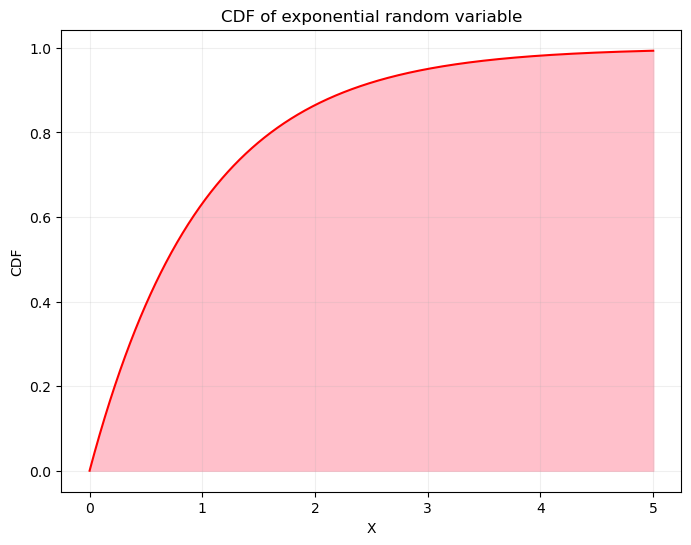

In [50]:
def exp_cdf(lam,x):
    if x<=0:
        return 0
    return 1-np.exp(-lam*x)
    
X = torch.linspace(0,5,1000)
lam = 1

cdf = [exp_cdf(lam,x) for x in X]

plt.figure(figsize=(8,6))
plt.plot(X,cdf,color='red')
plt.fill_between(X,cdf,color='pink')
plt.xlabel("X")
plt.ylabel("CDF")
plt.title("CDF of exponential random variable")
plt.grid(True,alpha=0.2)
plt.show()

#### Q3. (Optional)
A continuous random variable 𝑋 follows an Exponential distribution with a rate parameter 𝜆. The PDF of 𝑋 is given as:
$$ 𝑓_𝑋(𝑥)=𝜆𝑒^{−𝜆𝑥},𝑥≥0 $$

Your task is to compute the probability 𝑃(1≤𝑋≤3) using two different approaches:

(a) PDF Approach:
Compute the probability using numerical integration of the PDF over the interval [1,3].

(b) CDF Approach:
Compute the probability using the CDF formula.


In [69]:
def exp_pdf(lam,x):
    return lam*np.exp(-lam*x) if x >=0 else 0

X = torch.linspace(1,3,1000)
pdf = [exp_pdf(1,x) for x in X]
prob_pdf = np.trapz(pdf,X)

lam=1
print(f"The probability is {prob_pdf:.4f}")

The probability is 0.3181


In [70]:
prob_cdf = exp_cdf(lam,3) - exp_cdf(lam,1)
print(f"The probability is {prob_cdf :.4f}")

The probability is 0.3181



# 13. **Mean, Mode, and Median**  
*(Refer to https://probability4datascience.com/slides/Slide_4_04.pdf)*



#### Q1. (Optional)
#### Compute Summary Statistics:
   Using a numerical dataset, write a Python snippet to compute the mean, median, and mode using built-in libraries.  



#### Q2. (**Mandatory**)
#### Visualize Distribution with Markers:  
   Generate a sample (e.g., from a normal distribution) and plot its histogram. Then mark the mean (red), median (green), and an approximate mode (blue, as the bin with maximum count) on the plot.  
   



### Q3. (Optional)
#### Sample vs. Theoretical Comparison:
   Generate 1000 samples from a known distribution (e.g., Uniform over [0, 10]) and compute the sample mean, median, and mode. Compare these with the theoretical values (mean = 5, median = 5).  



# 14. **Uniform Random Variables**  
*(Refer to https://probability4datascience.com/slides/Slide_4_05.pdf)*


#### Q1. (**Mandatory**)
#### Simulate and Plot PDF & CDF:  
   Simulate a Uniform random variable over [2, 5] and plot its PDF and CDF using matplotlib, matching the formulas in the slide.  
  


#### Q2. (Optional)
#### Compute Theoretical Moments:
   Calculate the theoretical mean and variance for a Uniform(a, b) random variable with a = 2 and b = 5 using the formulas from the slide.  
  

#### Q3. (Optional)
#### Probability Calculation Using CDF:  
   For X ∼ Uniform(2, 5), compute P[3 ≤ X ≤ 4] using the CDF approach described in the slide.  


# 15. **Exponential Random Variables**  
*(Refer https://probability4datascience.com/slides/Slide_4_06.pdf)*


#### Q1. (**Mandatory**)
#### Simulate and Overlay Theoretical PDF:  
   Simulate 1000 samples from an Exponential(λ = 0.5) distribution, then plot a histogram of the samples with the theoretical PDF overlay.  
  


#### Q2. (Optional)
#### Theoretical Mean and Variance:  
   Using the formulas from the slide, compute the theoretical mean and variance for an Exponential distribution with λ = 0.5.  
   


#### Q3. (Optional)
#### Compute Tail Probability:  
   For an Exponential(λ = 0.5) random variable, calculate P[T > 3] using the survival function (i.e. 1 – CDF) as derived in the slide.  
  

# 16. **Gaussian Random Variables**

#### Q1. (**Mandatory**)
The PDF of a Gaussian random variable $ X \sim \mathcal{N}(\mu, \sigma^2) $ is given by:

 $$
 f_X(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right).
 $$
1. Use `torch.distributions`, generate 100 random samples from a Gaussian distribution with a mean of 3 and a standard deviation of 2.
2. Plot a histogram of the samples and calculate the sample mean and variance of the distribution.
3. Repeat this process for sample sizes of 10000 and 1000000.

Observe how the shape of the histogram changes as the sample size increases. What patterns or trends do you notice in the calculated sample mean and variance?

#### Q2. (Optional)
Let $ X \sim \mathcal{N}(0,1) $ be a standard Gaussian random variable. Define a new random
variable $ Y = 4X + 10 $. What is the distribution of $ Y $? Verify your answer by ploting histogram of random variable $Y$. You can use `torch.distributions` for generating samples for Gaussian random vairable.

#### Q3. (Optional)

Let $X \sim \mathcal{N}(\mu_1, \sigma_1^2)$ with $\mu_1 = 3$ and $\sigma_1 = 2$, and let
$Y \sim \mathcal{N}(\mu_2, \sigma_2^2)$ with $\mu_2 = -1$ and $\sigma_2 = 1$. Define a new random variable
$Z = X + Y$.
1. Determine the theoretical mean and variance of Z. Write this in a markdown cell.
2. Verify the theoretical mean and variance that you get by generating 10,000 samples for 𝑋 and 𝑌 using `torch.distributions` and computing their sum to get 𝑍. Print the empirical mean and variance of 𝑍.
3. Plot histogram of the distribution of random variable 𝑍.


# 17. **Transformation of random Variables**

#### Q1. (**Mandatory**)
Write a function that performs the following tasks:

1. Generate 10,000 samples from a uniform distribution in the range [0, 1].
2. Apply a linear transformation Y = 2X + 3 to the generated samples.
3. Plot the histogram of the original samples and the transformed samples side by side.
4. Calculate and print the mean and variance of both the original and transformed distributions.

#### Q2. (Optional)
Let X be a continuous random variable following a Uniform(0,1) distribution. Define a new random variable: Y=−ln(X)

(a). Generate 10,000 samples of **X** and compute **Y**.

(b). Plot the histogram of **Y**, and compare it with the probability density function (PDF) of an exponential distribution with parameter λ=1/2.

#### Q3. (Optional)
Combined Transformation Involving a Logarithmic Function

Let $X \sim \mathcal{N}(0,1)$ and define a new random variable $Z = \ln(|X| + 1)$.

1. Use `torch.distributions` to simulate 10,000 samples of $X$, compute $Z$, and estimate its empirical distribution.
2. Plot the histogram of $Z$ and compare it with the histogram of $X$.


# 18. **Generating Random Numbers**

#### Q1. (**Mandatory**)

(a) Generate 10,000 samples from a uniform distribution U(0,1).

(b) Transform these samples to generate exponential random variables with parameter λ = 2.

(c) Plot a histogram of the generated exponential random variables.

#### Q2. (Optional)
Given an exponential distribution with rate parameter λ=3.

write a Python function that:

(a) Generates a single exponential random variable using inverse transform sampling.
Uses the transformation X=− 1/λ ln(1−U), where U is a uniform random number between 0 and 1 and returns the generated exponential random variable.

#### Q3. (Optional)
 Write a Python function that:

(a). Generates N random samples from a uniform distribution U(0,1) and transforms the samples into exponential random variables with rate λ=5 using inverse transform sampling.

(b) Apply a nonlinear transformation Z = X² to each generated exponential random variable X.

(c) Calculates and returns the following:

    (a) The proportion of values in Z that exceed a threshold t (provided as a function parameter).

    (b) The sample mean and sample variance of both X and Z.